In [1]:
# keras model 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pre-process iris class
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})


import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
x = iris.iloc[:, 1:5]
y = iris['Species']

In [4]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

## One Hot Encoding iris species
`[1, 0, 0], [0, 1, 0], [0, 0, 1]`

In [6]:
# encode y to integer
encoder = LabelEncoder()
encoded_y = encoder.fit(y).transform(y)

In [7]:
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# convert int to one hot encoded array
onehot_y = np_utils.to_categorical(encoded_y)

In [9]:
onehot_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Define Keras Model

In [16]:
def keras_model(hidden_act, output_act, lr=0.1):
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation=hidden_act))
    model.add(Dense(3, activation=output_act))
    sgd = SGD(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

## Train model

In [17]:
max_epochs = 500
model = keras_model('sigmoid', 'softmax', lr=0.01)
h = model.fit(x, onehot_y, epochs=max_epochs, verbose=0, batch_size=4)

Text(0, 0.5, 'accuracy')

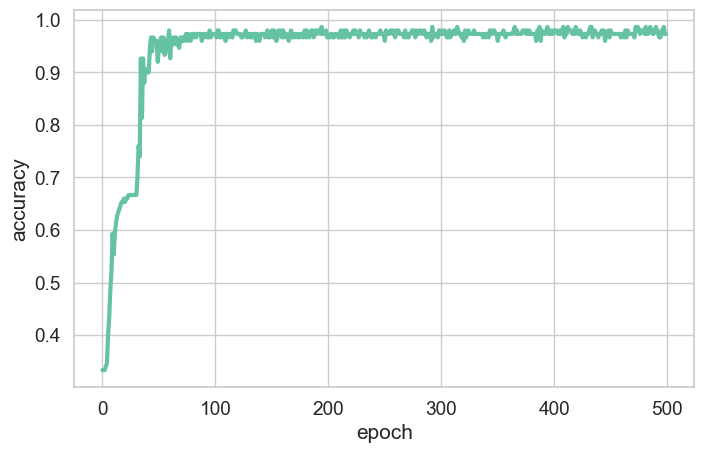

In [18]:
fig = plt.figure(figsize=(8, 5), dpi=100)
sns.lineplot(np.arange(max_epochs), h.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

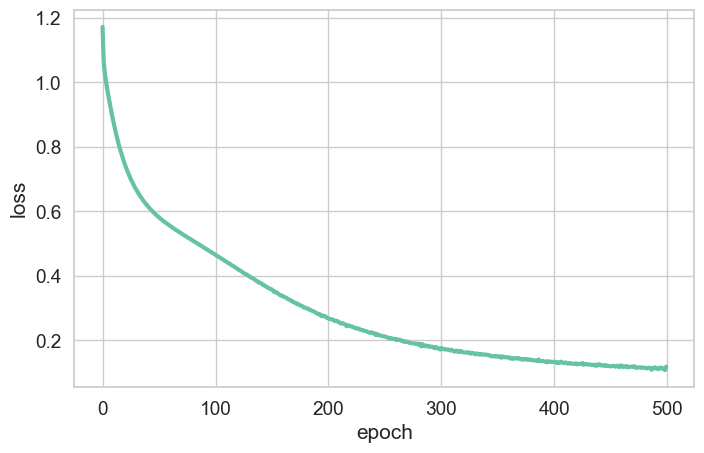

In [19]:
fig = plt.figure(figsize=(8, 5), dpi=100)
sns.lineplot(np.arange(max_epochs), h.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [20]:
np.round(model.predict_proba(x), 2)

array([[0.98, 0.02, 0.  ],
       [0.97, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
 

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
